# **Final Project for 4-Weeks Summer Internship at NIELIT Ropar**

# **Project By - Arsh Raj**
# **Course - Python With Data Science (4-Weeks)**


## **🎯 Objective of the Project**

The objective of this project is to perform Exploratory Data Analysis
(EDA) on the Indian Railways train schedule dataset using Python.

Dataset Used : https://www.kaggle.com/datasets/arihantjain09/indian-railways-latest

File Used : train_schedule.csv

The analysis aims to :

Understand the structure and distribution of railway routes across India.

Identify trends in train coverage, number of stops, and maximum route distances.

Visualize patterns such as longest-running trains, frequency of stops, and route distances.

Apply core data analysis tools and libraries including NumPy, Pandas, Matplotlib, and Seaborn to derive insights.

Gain hands-on experience in cleaning, processing, and analyzing real-world railway data.

## **Main Program**

### **Basic Operations**

- **Importing Librarries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- **Loading the Dataset**

In [ ]:
df = pd.read_csv("train_schedule.csv")

- **Display First 10 Rows**

In [ ]:
print(df.head(10))

   SN  Train_No Station_Code   1A   2A   3A   SL  Station_Name  Route_Number  \
0   1       107          SWV  100  100  100  100  SAWANTWADI R             1   
1   2       107         THVM  260  228  196  164        THIVIM             1   
2   3       107         KRMI  345  296  247  198       KARMALI             1   
3   4       107          MAO  490  412  334  256   MADGOAN JN.             1   
4   1       108          MAO  100  100  100  100   MADGOAN JN.             1   
5   2       108         KRMI  265  232  199  166       KARMALI             1   
6   3       108         THVM  355  304  253  202        THIVIM             1   
7   4       108          SWV  515  432  349  266  SAWANTWADI R             1   
8   1       128          MAO  100  100  100  100   MADGOAN JN.             1   
9   2       128         KRMI  265  232  199  166       KARMALI             1   

  Arrival_time Departure_Time  Distance  
0     00:00:00       10:25:00         0  
1     11:06:00       11:08:00      

- **Show Columns**

In [ ]:
print("Columns in the dataset :")
print(df.columns.tolist())

Columns in the dataset :
['SN', 'Train_No', 'Station_Code', '1A', '2A', '3A', 'SL', 'Station_Name', 'Route_Number', 'Arrival_time', 'Departure_Time', 'Distance']


- **Shape of the Dataset**

In [ ]:
print("Shape of dataset :", df.shape)

Shape of dataset : (186074, 12)


- **Data Type of Each Column**

In [ ]:
print(df.dtypes)

SN                 int64
Train_No           int64
Station_Code      object
1A                 int64
2A                 int64
3A                 int64
SL                 int64
Station_Name      object
Route_Number       int64
Arrival_time      object
Departure_Time    object
Distance           int64
dtype: object


- **Check for Misssing Values**

In [ ]:
print("Missing values in each column :")
print(df.isnull().sum())

Missing values in each column :
SN                0
Train_No          0
Station_Code      0
1A                0
2A                0
3A                0
SL                0
Station_Name      0
Route_Number      0
Arrival_time      0
Departure_Time    0
Distance          0
dtype: int64


- **Count Unique Train Numbers**

In [ ]:
print("Total unique trains :", df['Train_No'].nunique())

Total unique trains : 11113


- **Get All Unique Station Names**

In [ ]:
print("Unique stations :", df['Station_Name'].nunique())

Unique stations : 8099


- **Value Count of Number of Stops for a Train**

In [ ]:
print(df[df['Train_No'] == 12046]['Station_Name'].count())

4


### **Numpy Operations**

- **Convert a Column to NumPy Array**

In [ ]:
distance_array = df['Distance'].to_numpy()
print("First 10 distance values :\n", distance_array[:10])

First 10 distance values :
 [ 0 32 49 78  0 33 51 83  0 33]


- **Basic NumPy Stats on Distance**

In [ ]:
print("Mean Distance :", np.mean(distance_array))
print("Max Distance :", np.max(distance_array))
print("Min Distance :", np.min(distance_array))
print("Standard Deviation :", np.std(distance_array))

Mean Distance : 281.3538377204768
Max Distance : 4260
Min Distance : 0
Standard Deviation : 483.74266423767114


- **Count How Many Stations are > 500 km from Start**

In [ ]:
stations_over_500 = np.sum(distance_array > 500)
print("Stations more than 500 km from Origin :", stations_over_500)

Stations more than 500 km from Origin : 31837


- **Find Unique Distances**

In [ ]:
unique_distances = np.unique(distance_array)
print("Number of unique distance values :", len(unique_distances))

Number of unique distance values : 3097


- **Create a Mask for Stations That Are Mid-Route (100–500 km)**

In [ ]:
mid_route_mask = (distance_array >= 100) & (distance_array <= 500)
print("Stations between 100–500 km :", np.sum(mid_route_mask))

Stations between 100–500 km : 48691


- **Perform Vectorized Operation (e.g. Convert Km to Miles)**

In [ ]:
distance_miles = distance_array * 0.621371
print("First 10 distances in miles :", distance_miles[:10])

First 10 distances in miles : [ 0.       19.883872 30.447179 48.466938  0.       20.505243 31.689921
 51.573793  0.       20.505243]


### **Pandas Operations**

- **Group the Data to Find Max Distance per Train**

In [ ]:
max_distance_per_train = df.groupby('Train_No')['Distance'].max().reset_index()
print(max_distance_per_train.head(10))

   Train_No  Distance
0       107        78
1       108        83
2       128       978
3       290      2694
4       401      1618
5       421      1276
6       422      1277
7       477      2616
8       502      1206
9       504      1313


- **Count Number of Stops for Each Train**

In [ ]:
stops_per_train = df.groupby('Train_No')['Station_Name'].count().reset_index(name='No_of_Stops')
print(stops_per_train.sort_values(by='No_of_Stops', ascending=False).head(10))

      Train_No  No_of_Stops
5977     53041          118
1348     13007          112
1372     13049          111
7383     58112          109
1349     13008          108
5978     53042          107
1373     13050          106
7382     58111          102
2431     19019           98
1483     13352           97


- **Clean Coulmns and Check for Missing Values**

In [ ]:
df.columns = df.columns.str.strip()
print("Cleaned column names:", df.columns.tolist())
print("Missing values in each column:\n", df.isnull().sum())

Cleaned column names: ['SN', 'Train_No', 'Station_Code', '1A', '2A', '3A', 'SL', 'Station_Name', 'Route_Number', 'Arrival_time', 'Departure_Time', 'Distance']
Missing values in each column:
 SN                0
Train_No          0
Station_Code      0
1A                0
2A                0
3A                0
SL                0
Station_Name      0
Route_Number      0
Arrival_time      0
Departure_Time    0
Distance          0
dtype: int64


- **Replace Invalid Times (e.g., 00:00:00) with NaN**

In [ ]:
df = pd.read_csv('train_schedule.csv')

df['Arrival_time'] = df['Arrival_time'].replace("00:00:00", pd.NA)
df['Departure_Time'] = df['Departure_Time'].replace("00:00:00", pd.NA)

missing_times = df[df['Arrival_time'].isna() | df['Departure_Time'].isna()]
print("Rows with missing Arrival or Departure time :")
print(missing_times.head(10))

Rows with missing Arrival or Departure time :
      SN  Train_No Station_Code    1A    2A    3A    SL  Station_Name  \
0      1       107          SWV   100   100   100   100  SAWANTWADI R   
3      4       107          MAO   490   412   334   256   MADGOAN JN.   
4      1       108          MAO   100   100   100   100   MADGOAN JN.   
7      4       108          SWV   515   432   349   266  SAWANTWADI R   
990    1      4831           JU   100   100   100   100   JODHPUR JN.   
1011  22      4831           HW  4510  3628  2746  1864   HARIDWAR JN   
1328   1      5715          NJP   100   100   100   100  NEW JALPAIGU   
1329   2      5715          KNE   535   448   361   274    KISHANGANJ   
1330   1      5716          KNE   100   100   100   100    KISHANGANJ   
1331   2      5716          NJP   535   448   361   274  NEW JALPAIGU   

      Route_Number Arrival_time Departure_Time  Distance  
0                1         <NA>       10:25:00         0  
3                1     12:10:00 

- **Trains with More Than 500 km Route**

In [ ]:
print(combined.columns)

total_distance = df.groupby('Train_No')['Distance'].max().reset_index()
total_distance.rename(columns={'Distance': 'Total_Distance_km'}, inplace=True)

combined = pd.merge(df, total_distance, on='Train_No')

long_routes = combined[combined['Total_Distance_km'] > 500]
print("Trains with route > 500 km:", len(long_routes))

Index(['SN', 'Train_No', 'Station_Code', '1A', '2A', '3A', 'SL',
       'Station_Name', 'Route_Number', 'Arrival_time', 'Departure_Time',
       'Distance', 'Total_Distance_km'],
      dtype='object')
Trains with route > 500 km: 59335


- **Fill Remaining NaN with Forward Fill or 0**

In [ ]:
df.ffill(inplace=True)

print("Missing values after forward fill:")
print(df.isna().sum())

Missing values after forward fill:
SN                0
Train_No          0
Station_Code      0
1A                0
2A                0
3A                0
SL                0
Station_Name      0
Route_Number      0
Arrival_time      1
Departure_Time    0
Distance          0
dtype: int64


- **Remove Duplicates**

In [ ]:
df.drop_duplicates(inplace=True)


### **Data Visualization with Matplotlib & Seaborn**

- **Histogram of Route Distances**

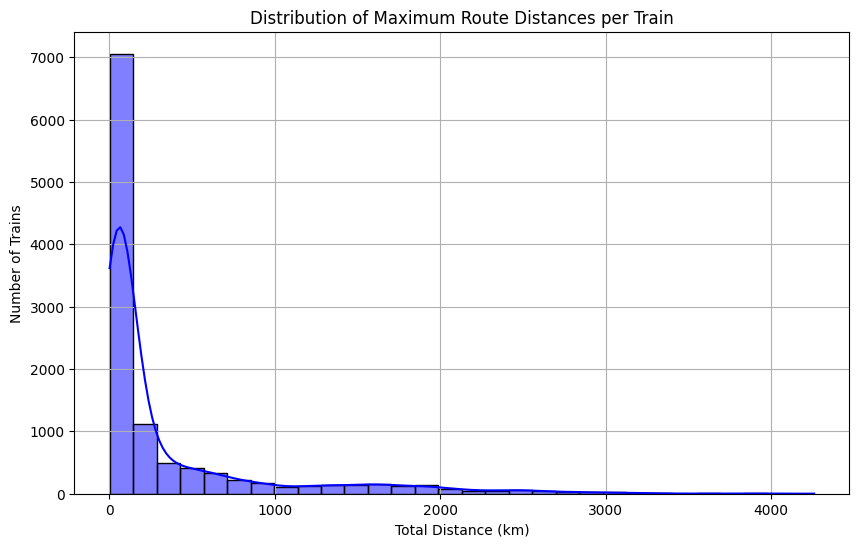

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(max_distance_per_train['Distance'], bins=30, kde=True, color='blue')
plt.title("Distribution of Maximum Route Distances per Train")
plt.xlabel("Total Distance (km)")
plt.ylabel("Number of Trains")
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['SN', 'Train_No', 'Station_Code', '1A', '2A', '3A', 'SL',
       'Station_Name', 'Route_Number', 'Arrival_time', 'Departure_Time',
       'Distance'],
      dtype='object')

- **Bar Plot – Top 10 Longest Train Routes**

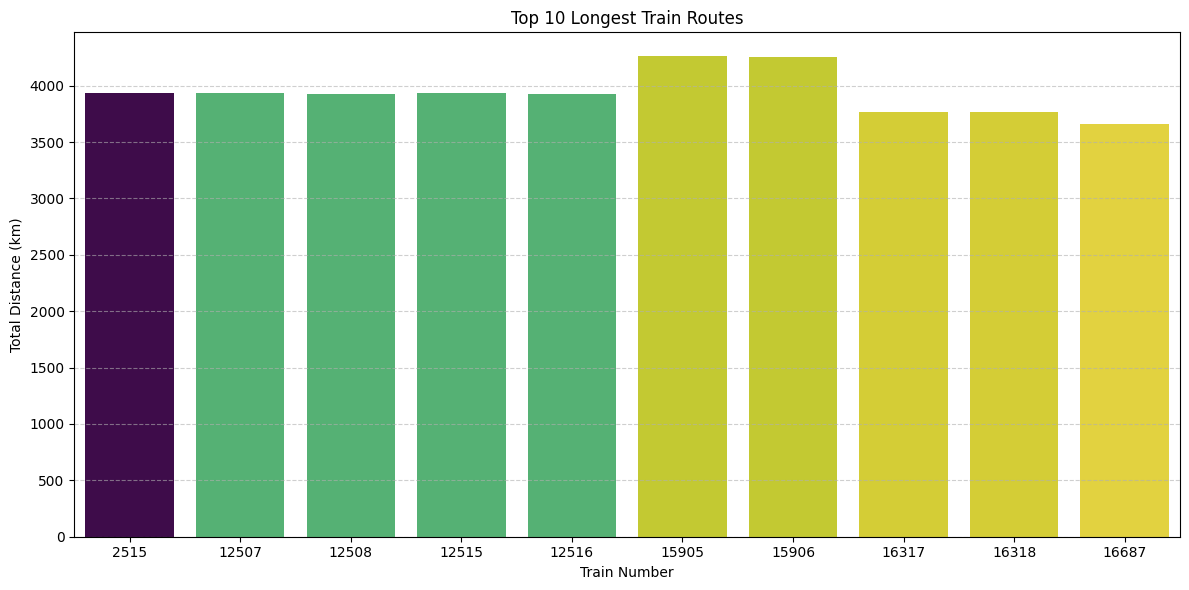

In [ ]:
top_10 = max_distance_per_train.sort_values(by='Distance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Train_No',
    y='Distance',
    data=top_10,
    palette='viridis',
    hue='Train_No',
    dodge=False,
    legend=False
)

plt.title("Top 10 Longest Train Routes")
plt.xlabel("Train Number")
plt.ylabel("Total Distance (km)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- **Scatter Plot – Distance vs Stops**

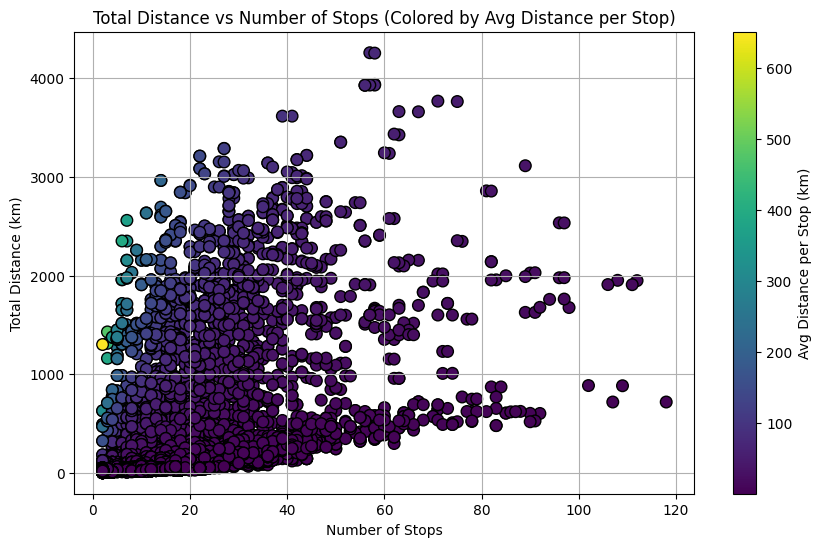

In [ ]:
df = df.dropna(subset=['Distance', 'Station_Name'])

train_distance = df.groupby('Train_No')['Distance'].max().reset_index(name='Total_Distance_km')
train_stops = df.groupby('Train_No')['Station_Name'].count().reset_index(name='No_of_Stops')

summary_df = pd.merge(train_distance, train_stops, on='Train_No')
summary_df['Avg_Distance_Per_Stop'] = summary_df['Total_Distance_km'] / summary_df['No_of_Stops']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=summary_df['No_of_Stops'],
    y=summary_df['Total_Distance_km'],
    c=summary_df['Avg_Distance_Per_Stop'],
    cmap='viridis',
    s=70,
    edgecolors='black'
)

plt.colorbar(scatter, label='Avg Distance per Stop (km)')
plt.title("Total Distance vs Number of Stops (Colored by Avg Distance per Stop)")
plt.xlabel("Number of Stops")
plt.ylabel("Total Distance (km)")
plt.grid(True)
plt.show()

- **Boxplot – Distribution of Avg Distance per Stop**

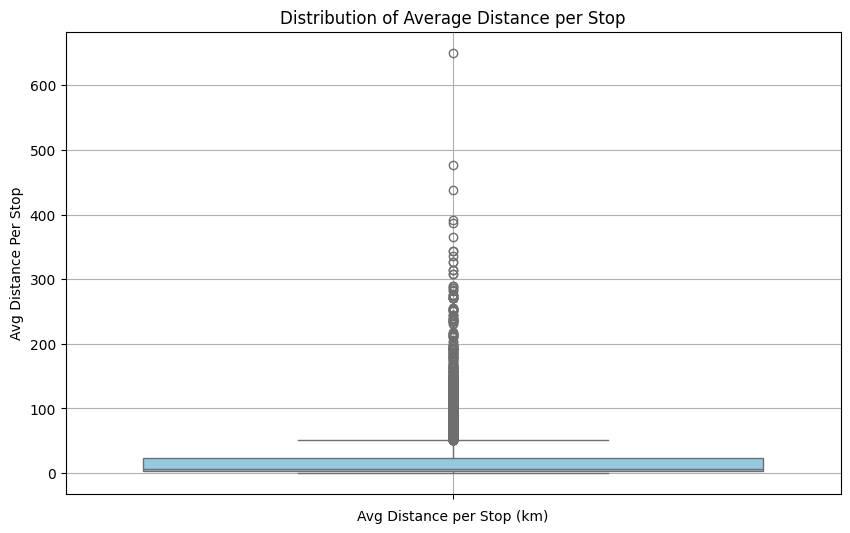

In [ ]:
df = df.dropna(subset=['Distance', 'Station_Name'])

train_distance = df.groupby('Train_No')['Distance'].max().reset_index(name='Total_Distance_km')
train_stops = df.groupby('Train_No')['Station_Name'].count().reset_index(name='No_of_Stops')

summary_df = pd.merge(train_distance, train_stops, on='Train_No')
summary_df['Avg Distance Per Stop'] = summary_df['Total_Distance_km'] / summary_df['No_of_Stops']

plt.figure(figsize=(10, 6))
sns.boxplot(data=summary_df['Avg Distance Per Stop'], color='skyblue')
plt.title("Distribution of Average Distance per Stop")
plt.xlabel("Avg Distance per Stop (km)")
plt.grid(True)
plt.show()

- **Line Plot – Number of Trains by Stops (Grouped)**

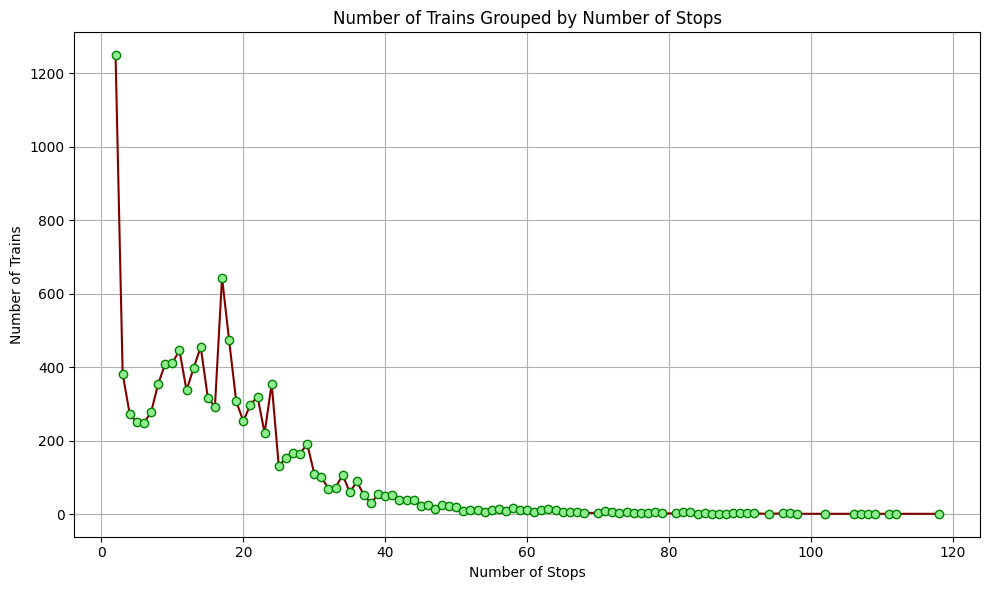

In [ ]:
stops_per_train = df.groupby('Train_No')['Station_Name'].count().reset_index()
stops_per_train.rename(columns={'Station_Name': 'No_of_Stops'}, inplace=True)

trains_by_stops = stops_per_train['No_of_Stops'].value_counts().reset_index()
trains_by_stops.columns = ['No_of_Stops', 'Number_of_Trains']
trains_by_stops = trains_by_stops.sort_values('No_of_Stops')

plt.figure(figsize=(10, 6))
plt.plot(trains_by_stops['No_of_Stops'], trains_by_stops['Number_of_Trains'], marker='o', color='maroon', mfc='lightgreen', mec='green')
plt.title("Number of Trains Grouped by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Number of Trains")
plt.grid(True)
plt.tight_layout()
plt.show()

- **Heatmap – Correlation Between Numerical Columns**

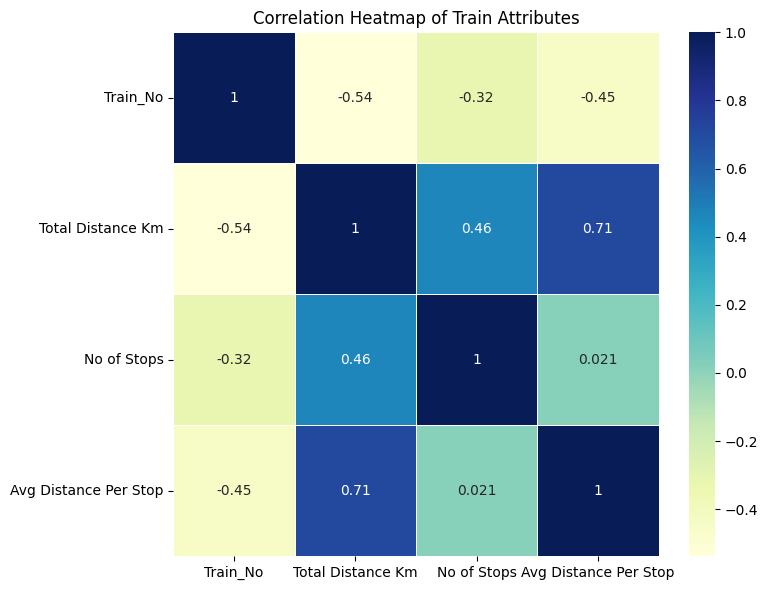

In [ ]:
train_distance = df.groupby('Train_No')['Distance'].max().reset_index(name='Total Distance Km')
train_stops = df.groupby('Train_No')['Station_Name'].count().reset_index(name='No of Stops')
summary_df = pd.merge(train_distance, train_stops, on='Train_No')
summary_df['Avg Distance Per Stop'] = summary_df['Total Distance Km'] / summary_df['No of Stops']

plt.figure(figsize=(8, 6))
sns.heatmap(summary_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap of Train Attributes")
plt.tight_layout()
plt.show()

# **Thank You**